In [71]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 

## 1. Passo a passo do Bagging

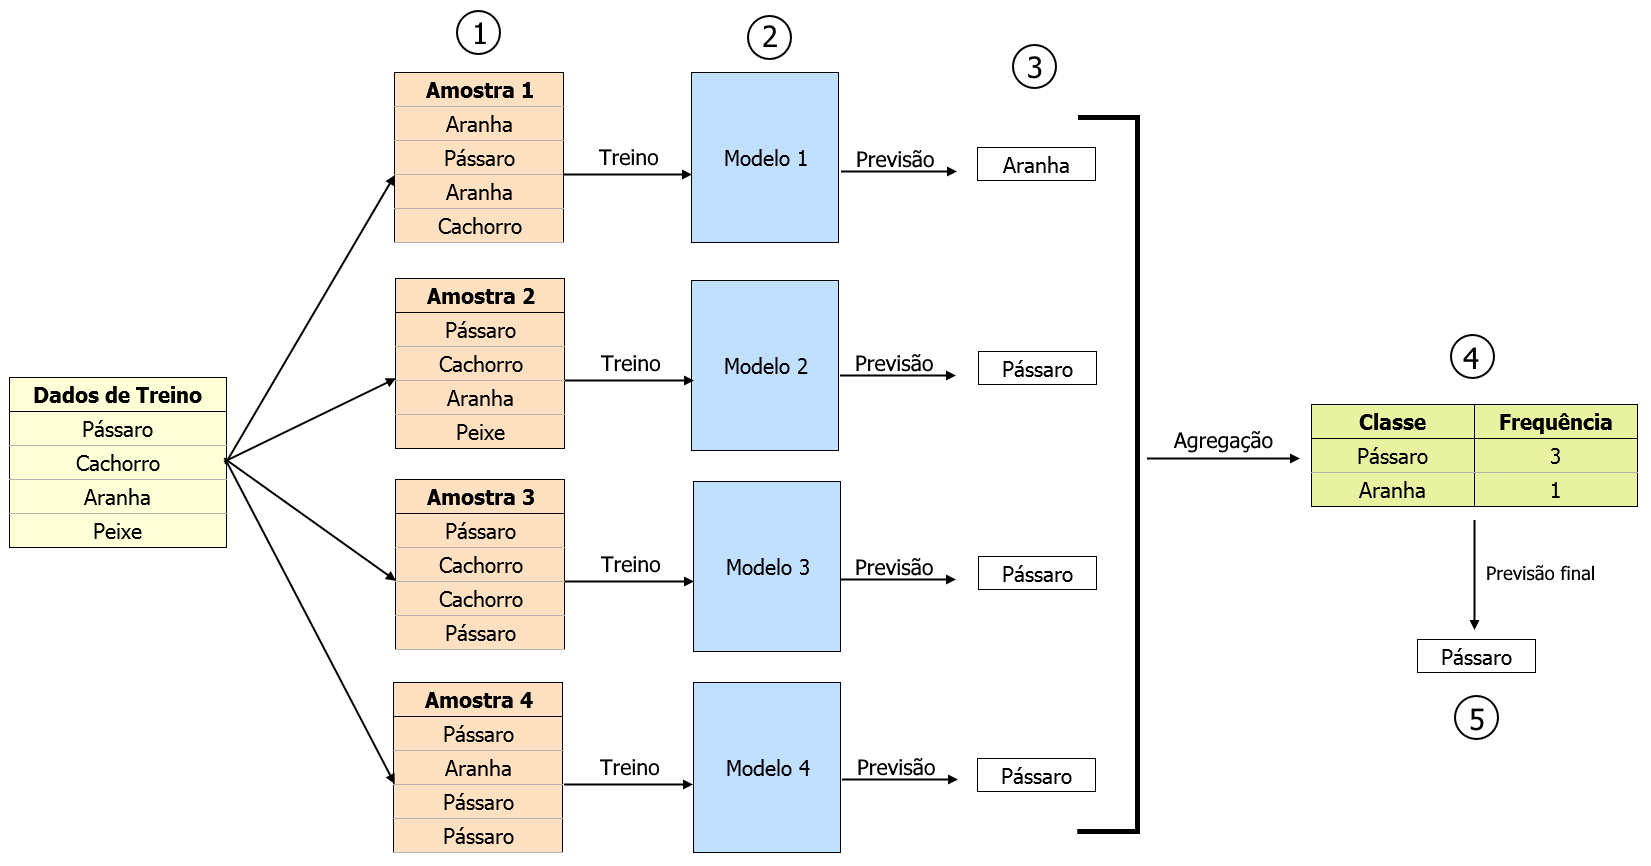

Basicamente o Bagging segue os sequintes passos:
1. Selecionamos subconjuntos aleatórios do dataset de dados original, com substituições
2. Criamos um modelo para cada subconjunto
3. Obtemos a previsão de cada modelo
4. Verificamos a frequência dos dados das previsões dos modelos
5. Definimos a previsão final baseado na previsão com maior frequência

## 2. Definição do Bagging

O bagging funciona selecionando subconjuntos aleatórios do dataset de dados original, com substituições. Em seguida, é criado um classificador (para modelos de classificação) ou um regressor (para modelos de regressão) para cada um desses subconjuntos. Cada modelo é treinado com seu respectivo subconjunto.

A previsão de cada modelo então é agregada usando a frequência das previsões dos modelos de classificação ou cálculo da média para os modelos de regressão. Isso ajuda a aumentar a precisão das previsões porque a previsão final é baseado em vários modelos.

## 3. Implementação do Bagging em Python

- **Criando um dataset de exemplo**

O dataset que será utilizado possui características físicas sobre 4 espécies de animais. É composto por 3 variáveis: quantidade de pernas, quantidade de asas e o nome da espécie do animal.

In [97]:
df = pd.DataFrame({
    'num_pernas': [2, 4, 8, 0],
    'num_asas': [2, 0, 0, 0],
    'especie': ['Pássaro', 'Cachorro', 'Aranha', 'Peixe']
})

df

,num_pernas,num_asas,especie
0,2,2,Pássaro
1,4,0,Cachorro
2,8,0,Aranha
3,0,0,Peixe


Usando o dataset acima como base, criamos 4 subconjuntos com substituições. Cada um terá 4 linhas assim como o dataset original.

- **Amostra 1**

In [17]:
amostra1 = df.sample(n=4, replace=True)
amostra1

,num_pernas,num_asas,especie
2,8,0,aranha
0,2,2,passaro
2,8,0,aranha
1,4,0,cachorro


- **Amostra 2**

In [18]:
amostra2 = df.sample(n=4, replace=True)
amostra2

,num_pernas,num_asas,especie
0,2,2,passaro
1,4,0,cachorro
2,8,0,aranha
3,0,0,peixe


- **Amostra 3**

In [19]:
amostra3 = df.sample(n=4, replace=True)
amostra3

,num_pernas,num_asas,especie
0,2,2,passaro
1,4,0,cachorro
1,4,0,cachorro
0,2,2,passaro


- **Amostra 4**

In [20]:
amostra4 = df.sample(n=4, replace=True)
amostra4

,num_pernas,num_asas,especie
0,2,2,passaro
2,8,0,aranha
0,2,2,passaro
0,2,2,passaro


- **Modelo de previsão**

Abaixo criamos uma função em python que recebe por parâmetro uma amostra e as variáveis preditivas. Aplicaremos essa função para cada amostra e iremos armazenar a previsão em cada uma delas para realizarmos a agregação posteriormente.

In [66]:
# função para treinar um modelo para cada amostra e retornar uma previsão sobre esse modelo treinado
def realizar_previsao(amostra, num_pernas, num_asas):
    # separamos as variáveis em X e y
    X = amostra.iloc[:, 0:2]
    y = amostra['especie']
    
    # criamos e treinamos o modelo com os dados da amostra
    dtree = DecisionTreeClassifier(random_state = 1)
    dtree.fit(X, y)
    
    # criamos um DataFrame com as variáveis previsoras
    prever = pd.DataFrame({'num_pernas': [num_pernas], 'num_asas': [num_asas]})
    
    # retornamos a previsão referente ao modelo treinado
    return dtree.predict(prever)[0]

Abaixo definimos nossas variáveos preditivas. Queremos encontrar uma espécie animal com 4 pernas e que não possui asas.

In [99]:
num_pernas = 4
num_asas = 0

Abaixo executamos a função que treina um modelo para cada amostra e retorna a previsão para cada uma delas

In [91]:
previsoes = pd.DataFrame({'previsoes': [
    realizar_previsao(amostra1, num_pernas, num_asas),
    realizar_previsao(amostra2, num_pernas, num_asas),
    realizar_previsao(amostra3, num_pernas, num_asas),
    realizar_previsao(amostra4, num_pernas, num_asas)
]})

In [92]:
previsoes

,previsoes
0,cachorro
1,cachorro
2,cachorro
3,aranha


No próximo passo calculamos a frequência do resultado da previsão nas 4 amostras.

In [95]:
freq = prev.value_counts()
freq

previsoes
cachorro     3
aranha       1
dtype: int64

Podemos verificar que 3 modelos apontaram a espécie 'cachorro' para as variáveis preditivas e apenas 1 modelo 'aranha'. Abaixo obtemos a resposta com a maior frequência

In [96]:
freq.index[0][0]

'cachorro'